In [1]:
import os
import random
from glob import glob

import cv2
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
ori_img_paths = glob('data/carvana_image_masking_dataset/train/*.jpg')
ori_img_paths = sorted(ori_img_paths)
len(ori_img_paths)

5088

In [3]:
mask_paths = glob('data/carvana_image_masking_dataset/train_masks/*.gif')
mask_paths = sorted(mask_paths)
len(mask_paths)

5088

In [4]:
rand_idx = random.randint(0, len(ori_img_paths))
ori_img_path, mask_path = ori_img_paths[rand_idx], mask_paths[rand_idx]

ori_img = Image.open(ori_img_path).convert('RGB')
mask = Image.open(mask_path).convert('L')

np.array(ori_img).shape, np.array(mask).shape

((1280, 1918, 3), (1280, 1918))

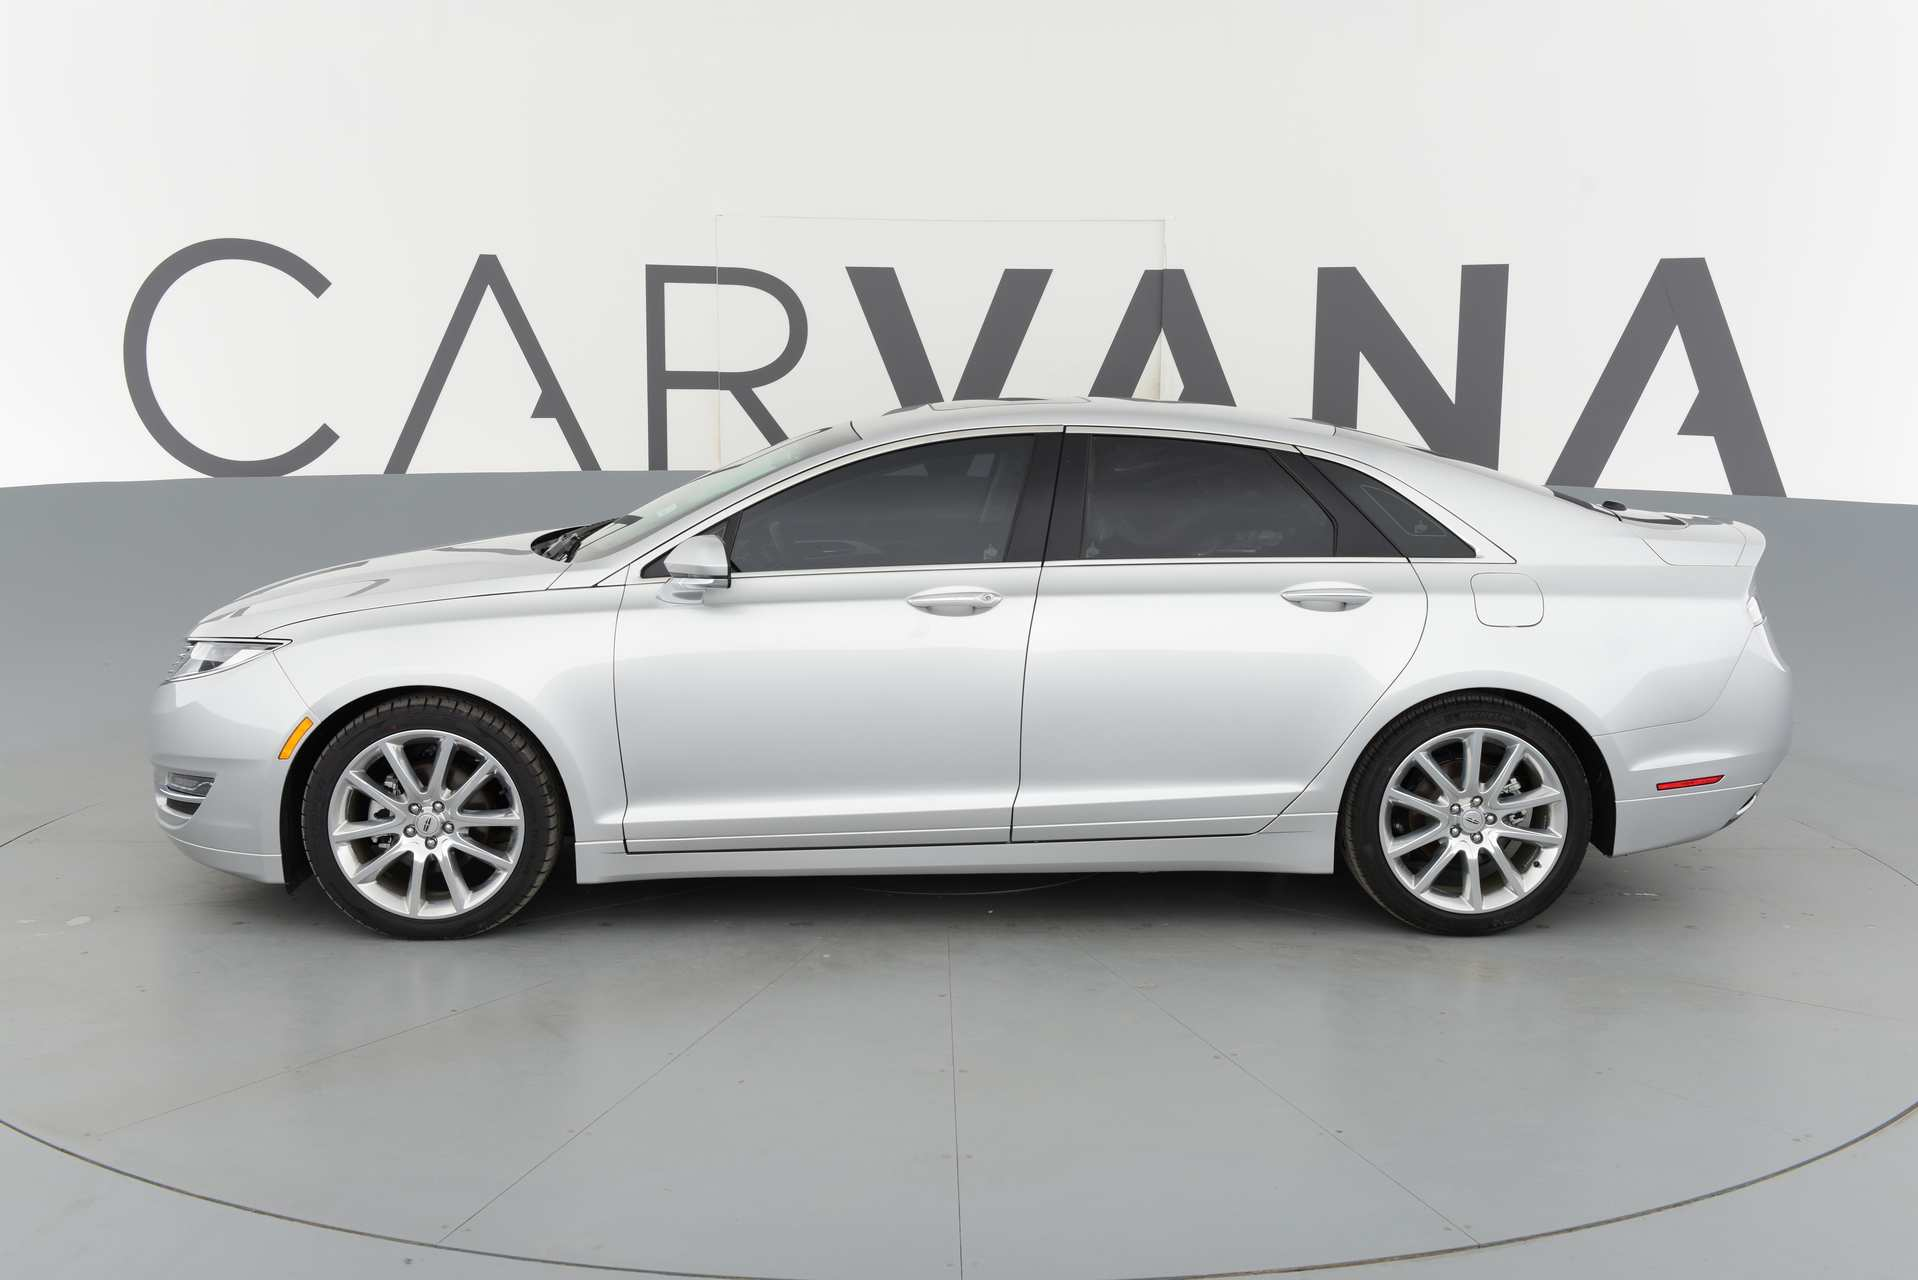

In [5]:
ori_img

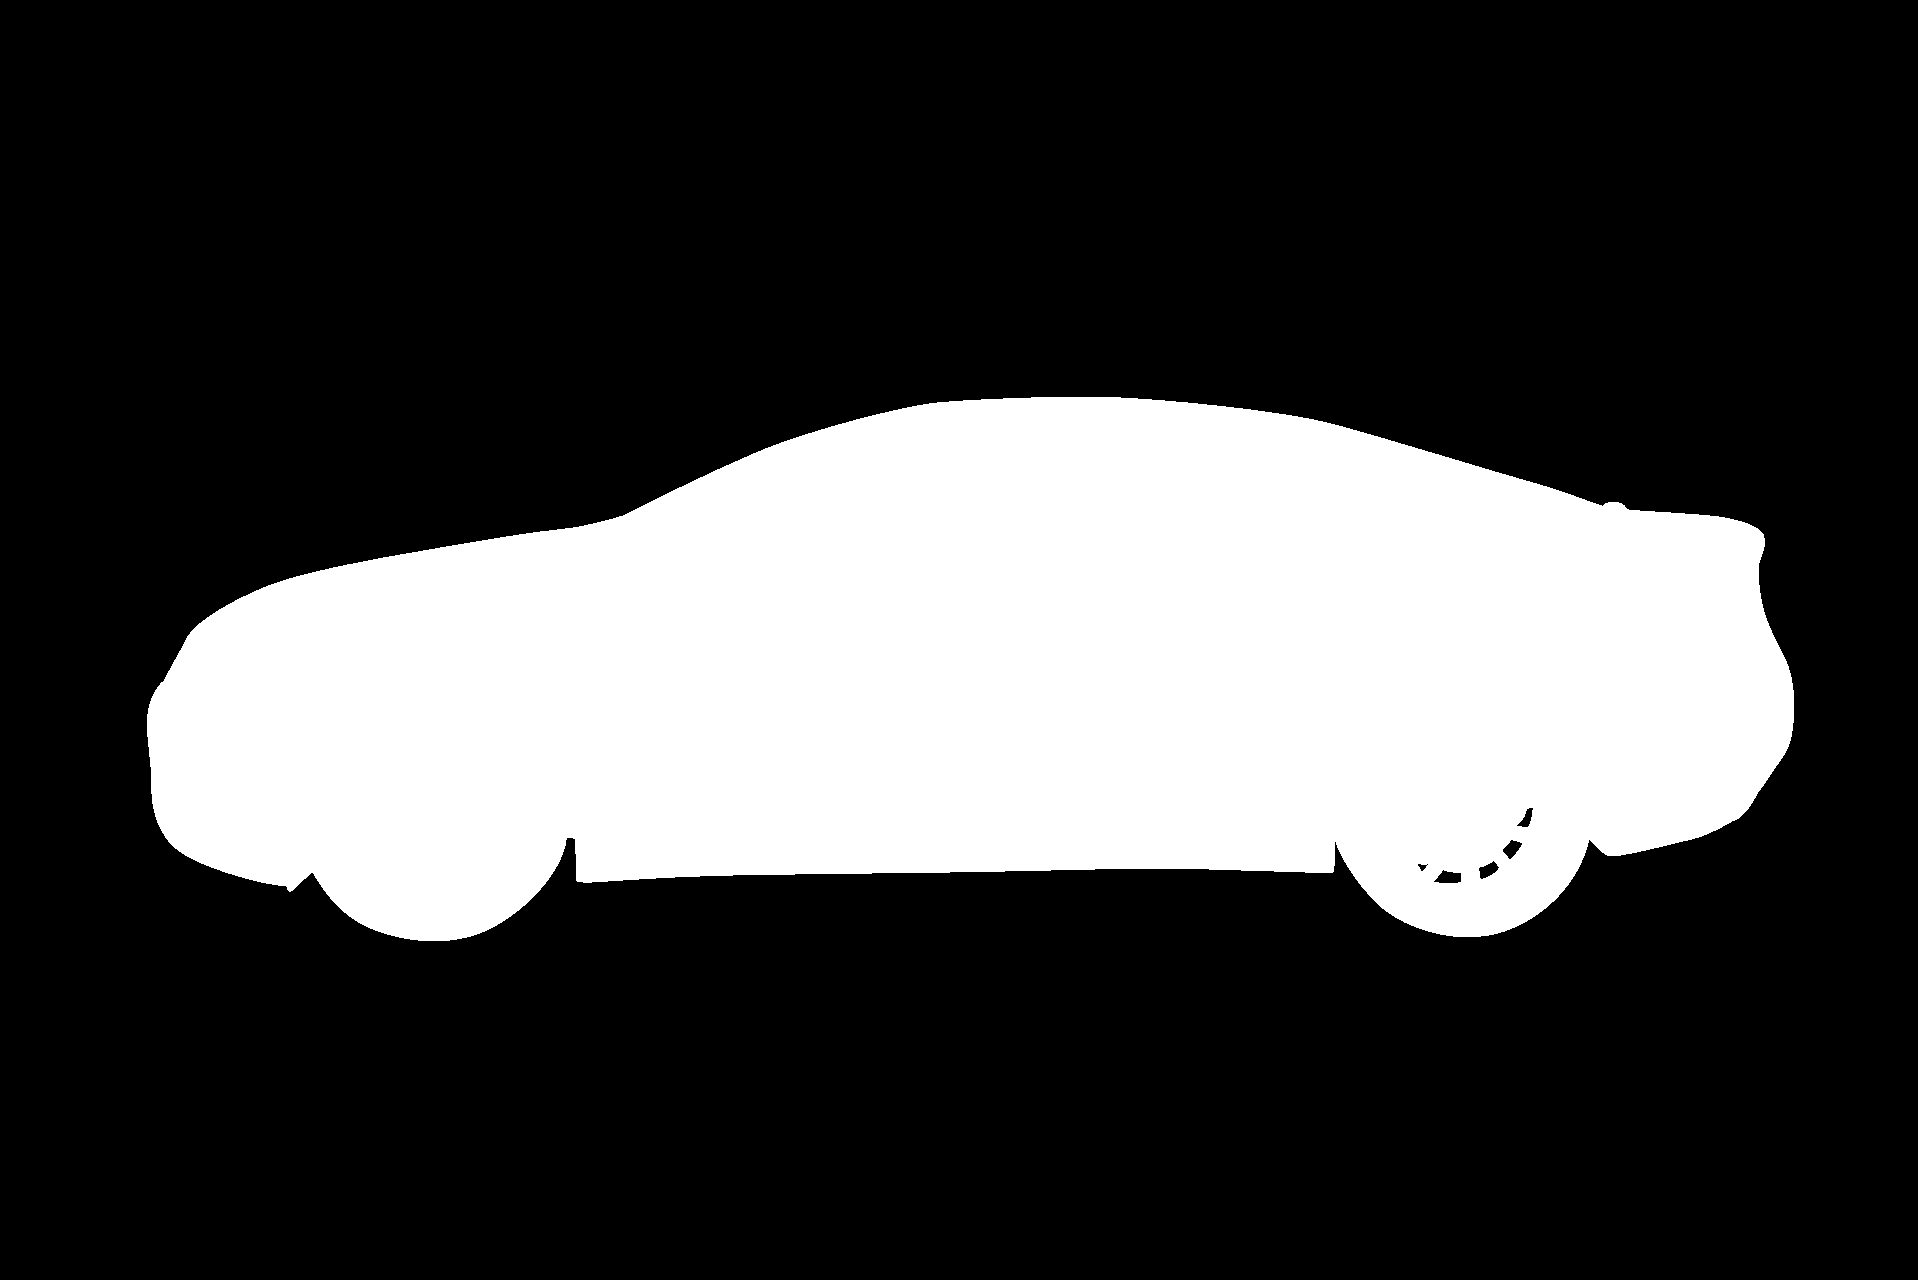

In [6]:
mask

In [7]:
np.array(mask).shape

(1280, 1918)

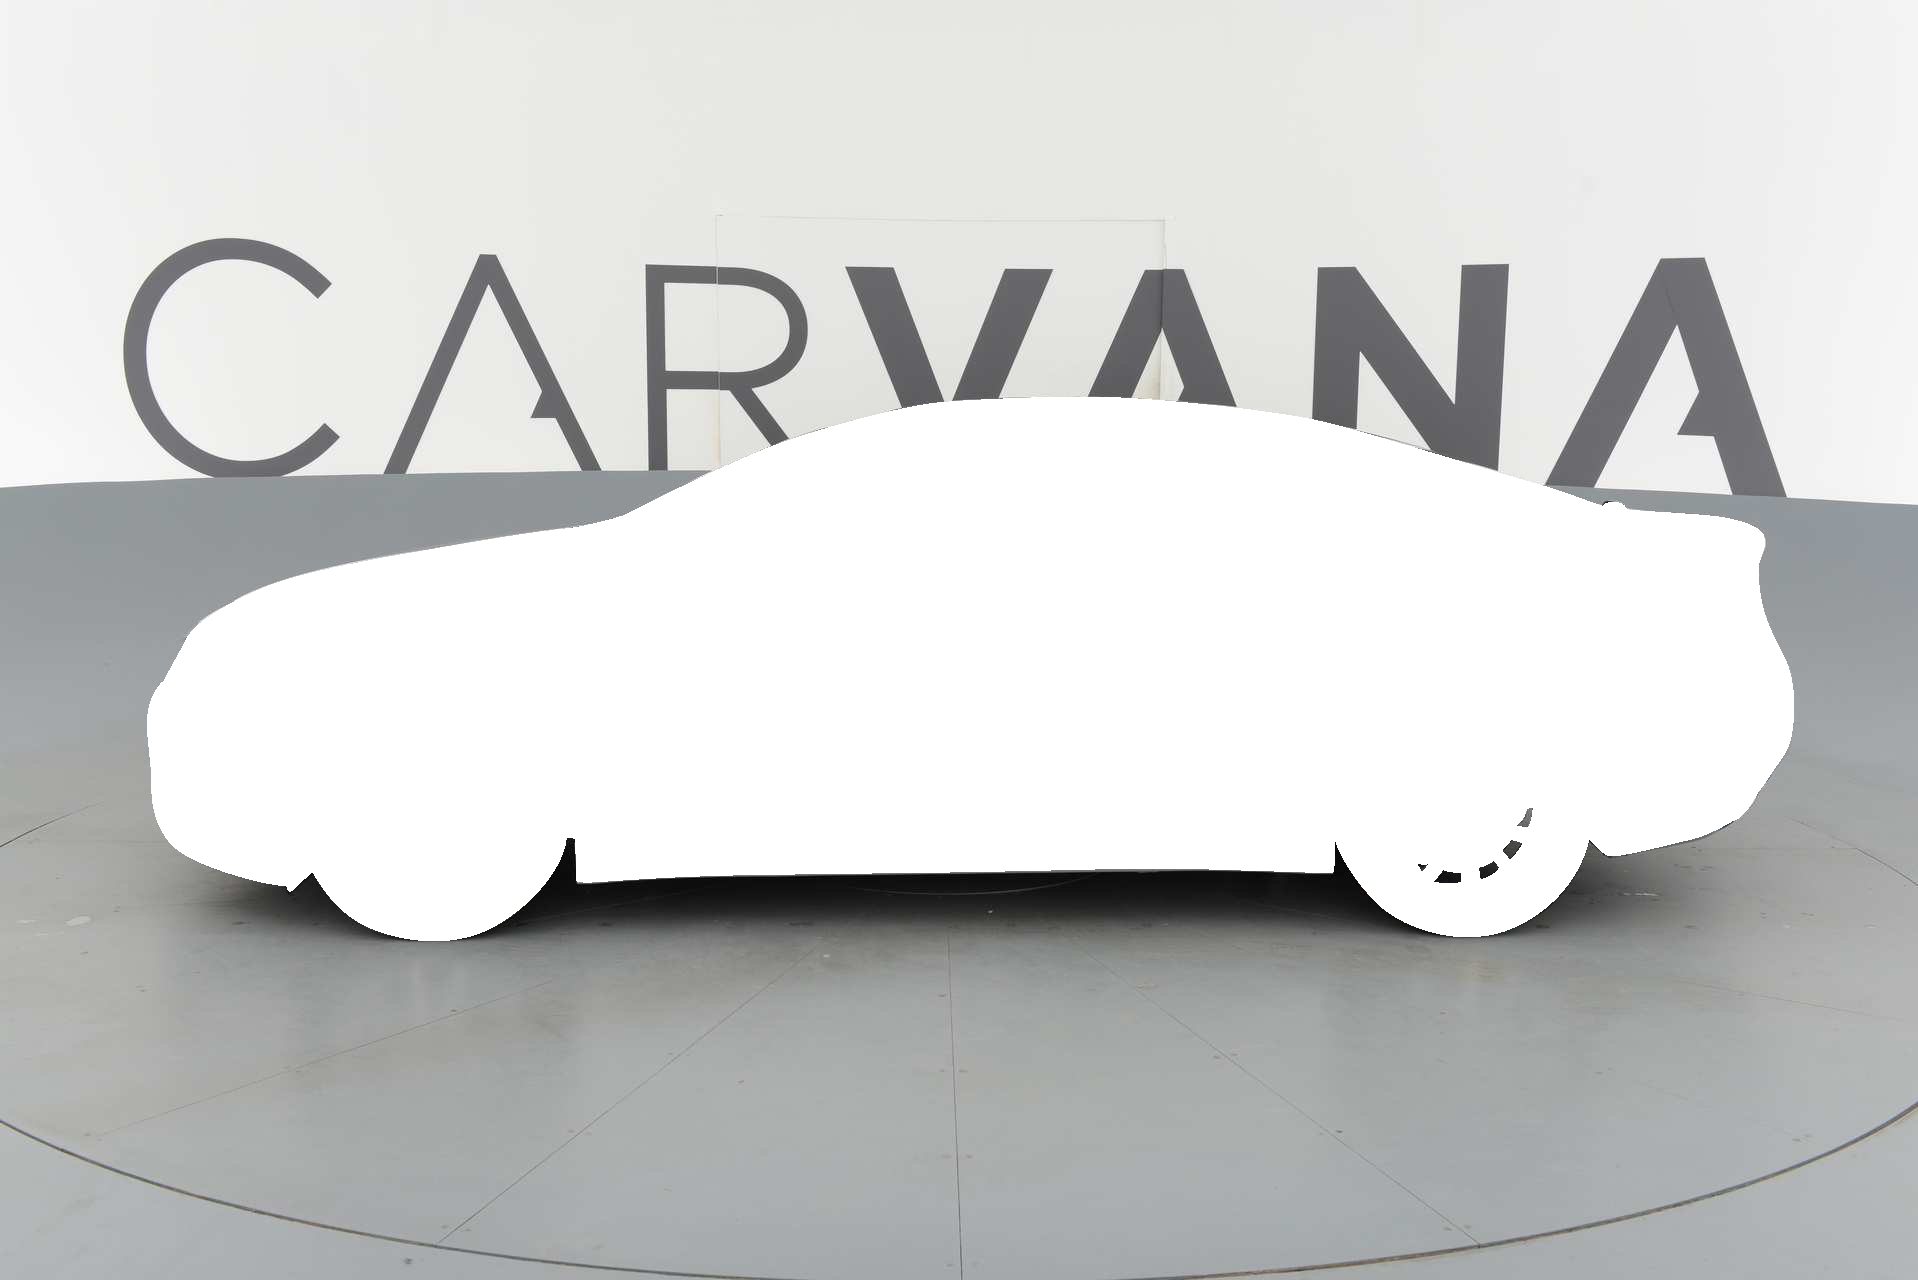

In [8]:
Image.composite(mask, ori_img, mask)

In [9]:
# Run-length encoding (RLE)
df = pd.read_csv('data/carvana_image_masking_dataset/train_masks.csv')
df

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...
...,...,...
5083,fff9b3a5373f_12.jpg,386005 13 387915 27 389829 34 391744 38 393660...
5084,fff9b3a5373f_13.jpg,393674 6 395585 19 397498 26 399412 32 401327 ...
5085,fff9b3a5373f_14.jpg,401397 9 403309 19 405223 26 405389 145 407138...
5086,fff9b3a5373f_15.jpg,407257 6 407393 89 409171 12 409263 179 411086...


In [10]:
rand_idx = random.randint(0, len(ori_img_paths))
img_df = df.iloc[rand_idx]
img_name, rle_mask = img_df.img, img_df.rle_mask
img_name, rle_mask

('eefc0d8c94f0_06.jpg',
 '465687 2 467604 3 469521 3 471438 3 473355 4 475272 4 477189 4 479107 3 481024 4 482941 4 484858 4 486776 3 488693 3 490610 4 492527 4 494445 3 496362 3 498279 4 500196 4 502114 3 504031 3 505948 4 507865 4 509782 4 511700 3 513617 4 515534 4 517451 4 519368 4 521286 4 523203 4 525120 4 527037 4 528955 4 530872 4 532789 4 534706 5 536623 5 538541 4 540458 4 542375 5 544292 5 546209 5 547716 84 548127 4 549605 146 550044 5 551502 195 551961 5 553403 239 553878 5 555306 280 555795 5 557211 318 557713 5 559117 354 559630 5 561024 388 561522 12 561547 5 562931 422 563435 27 563464 5 564839 455 565351 36 566748 487 567267 39 568656 521 569183 41 570567 576 572477 584 574388 581 574977 3 576299 587 576896 2 578211 593 578815 13 580123 599 580732 25 582036 605 582650 35 583948 616 584566 47 585861 679 587775 691 589688 705 591602 717 593515 730 595429 742 597343 754 599257 766 601172 777 603086 788 605001 796 606915 803 608830 809 610745 813 612660 817 614575 820 616

In [11]:
ROOT = 'data/carvana_image_masking_dataset/train/'

In [12]:
def rle_decode(img_name, rle_mask_str):
    s = rle_mask_str.split()
    starts = np.array(s[0:][::2], dtype=int) - 1
    lengths = np.array(s[1:][::2], dtype=int)
    ends = starts + lengths

    img = cv2.imread(os.path.join(ROOT, img_name))
    mask = np.zeros(img.shape[0] * img.shape[1], dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        mask[lo:hi] = 1
    return img, np.reshape(mask, (img.shape[0], img.shape[1]))

In [13]:
img, mask = rle_decode(img_name, rle_mask)
img.shape, mask.shape

((1280, 1918, 3), (1280, 1918))

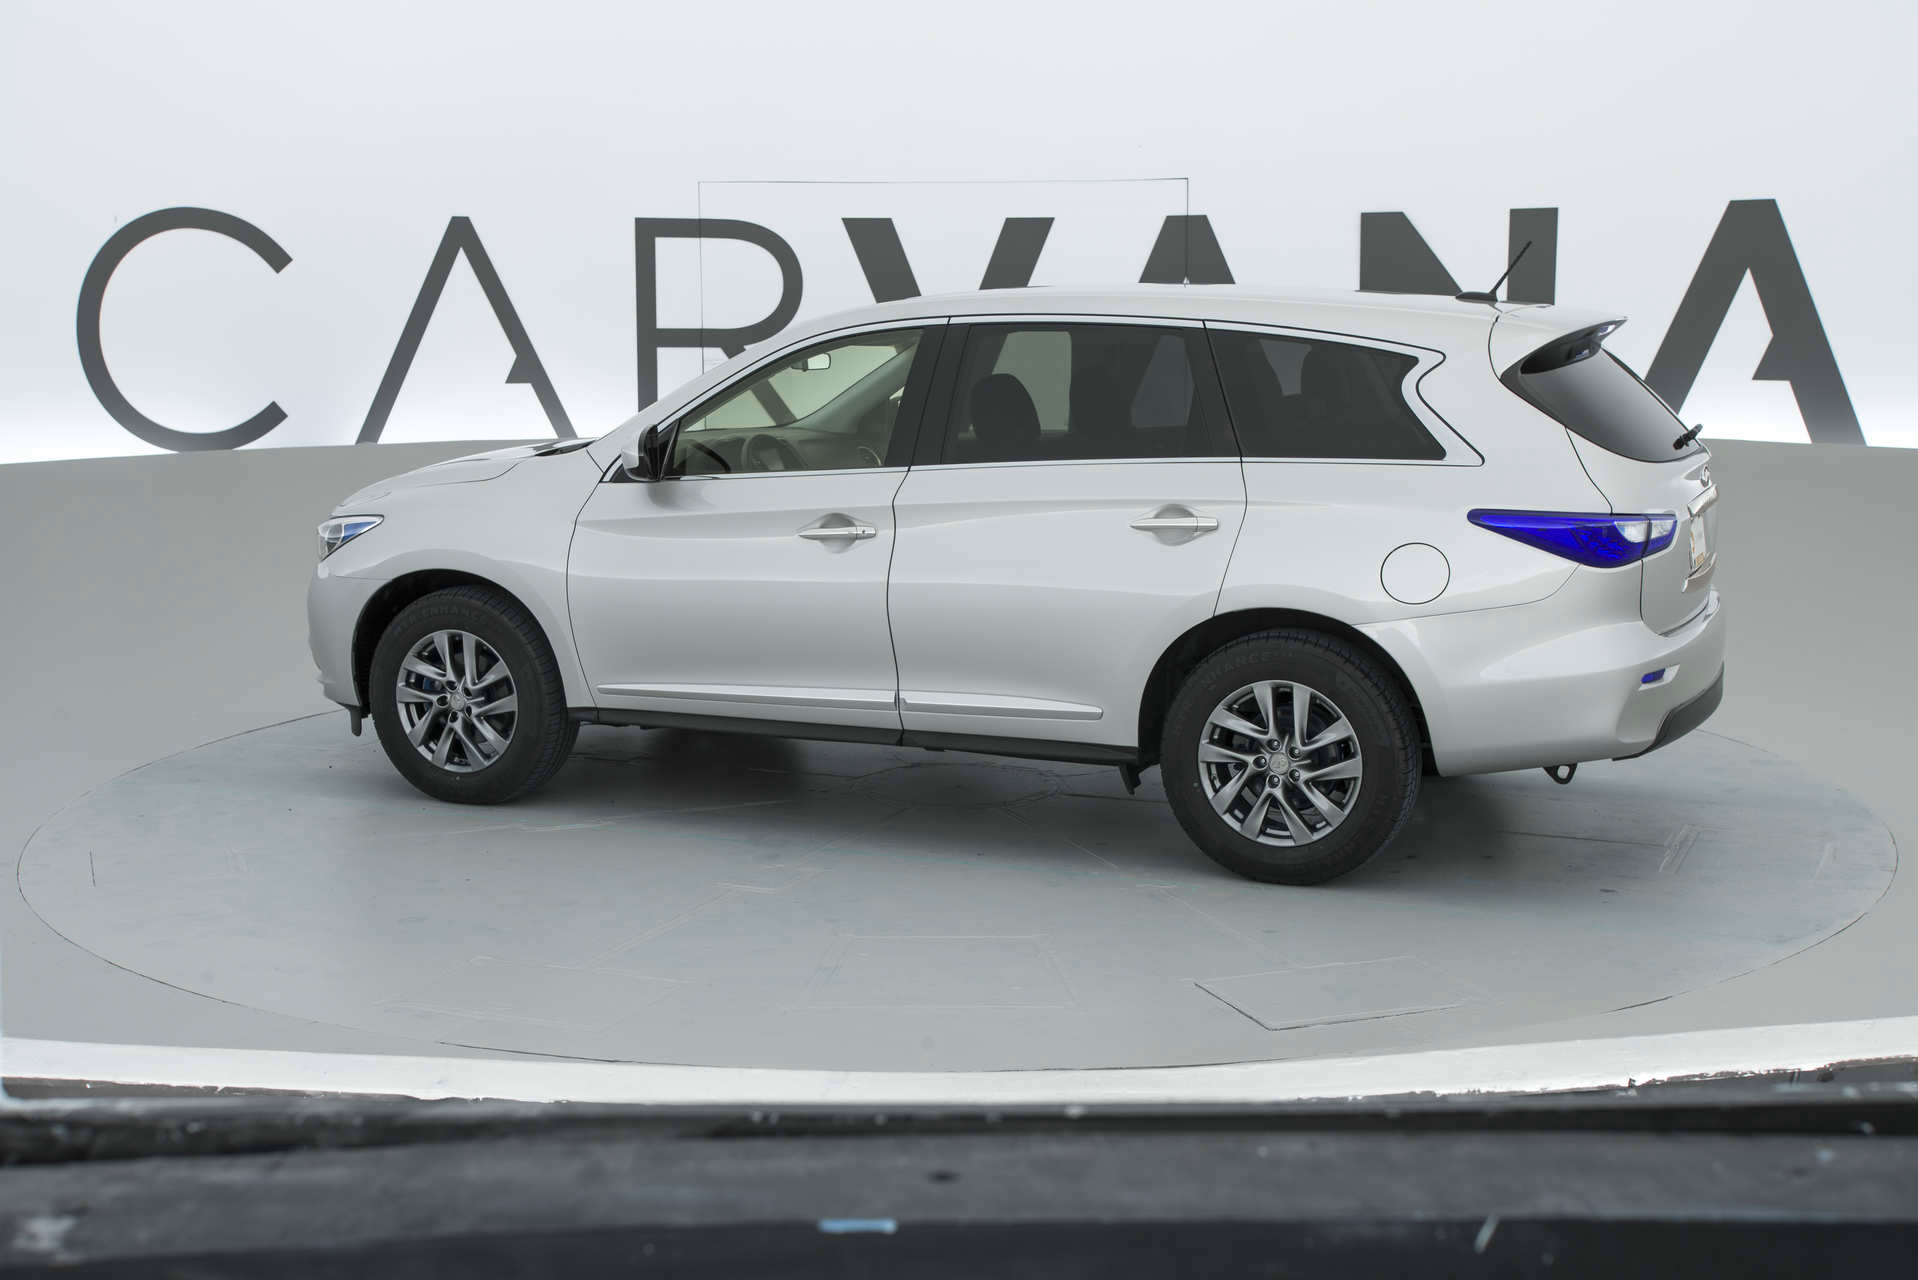

In [14]:
Image.fromarray(img)

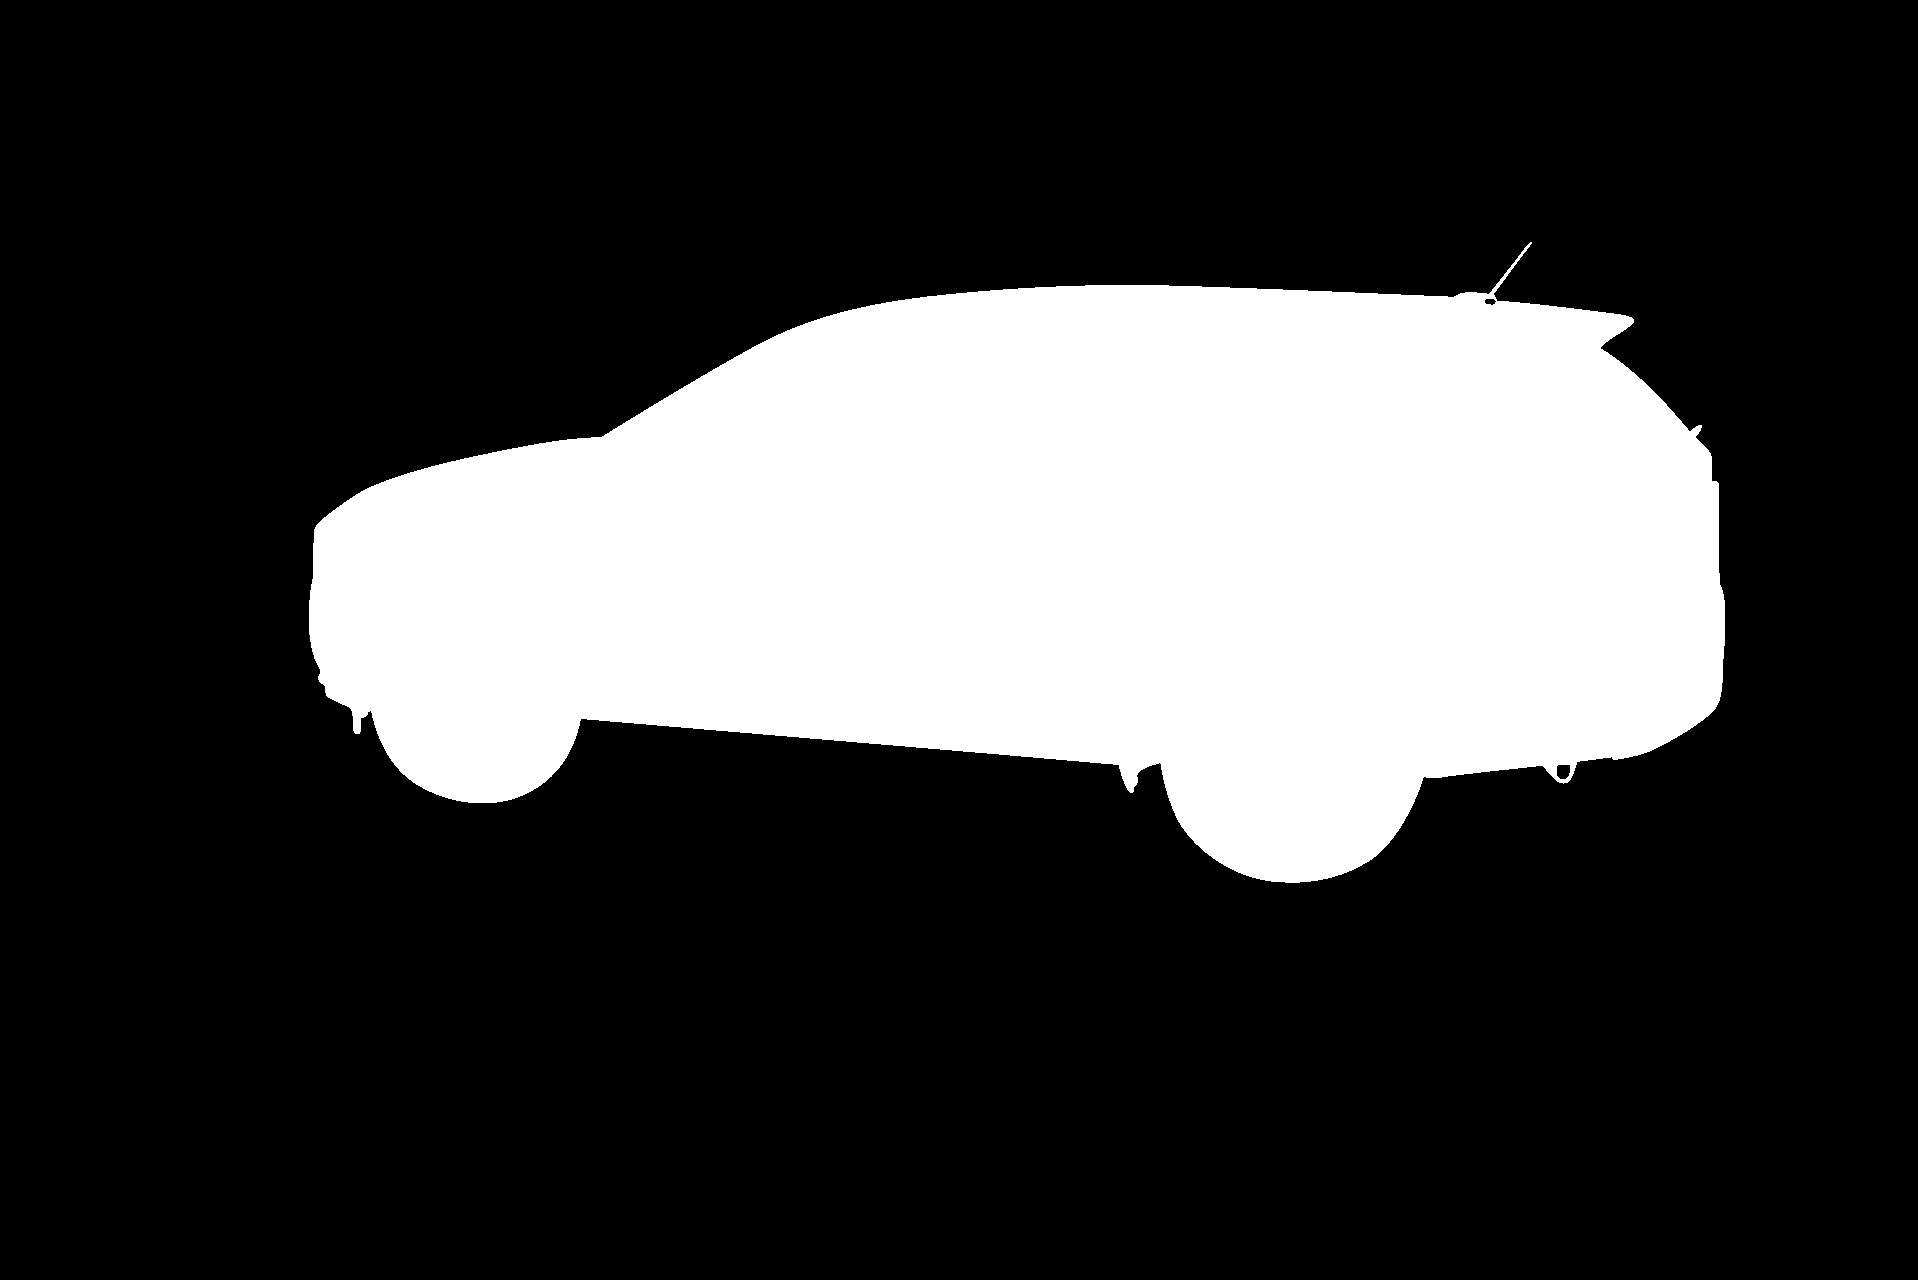

In [15]:
Image.fromarray(mask * 255)